In [12]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
from IPython.display import HTML
from collections import deque
import importlib


%load_ext autoreload
%autoreload 2

import simulation
import controller
from simulation import *
from main_bus import MainBus

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialization

In [13]:
whole_day = 1440

# Parameters

replay_length = 100000
iterations = 144 # num of ticks before training
epochs = 2000 # num of times network is unfrozen, trained
batch_size = 32 # num of samples from replay memory to train on
animate = False
add_arrivals_noise = False

# Model
loggers = [StateLogger(bus_id=24, save_every=1)]
simulation = Simulation(MainBus, loggers=loggers)
replay_memory = deque(maxlen = replay_length)
training_results = []
training_loss = []
delivered_passeners = []

save_every = 10

Initializing Prob Dist


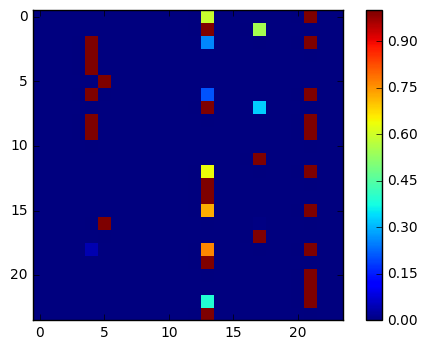

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.]
1.0


In [14]:
attractivity=simulation.controller.attractivity[10]

plt.imshow(attractivity, interpolation='none')
plt.colorbar()
plt.show()
urgency = np.zeros(24)
urgency[13] = 1
print(urgency.dot(attractivity))
print(attractivity[13,13])

In [15]:
simulation.reset()
simulation.execute(iterations=whole_day, animate=False, interval=100)

 1440 / 1440 

{'Bus 24 State Logger': [array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.124353  ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.08314097,  0.        ,  0.        ,  0.        ,  0.08314097,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
  

In [16]:
HTML(simulation.anim.to_html5_video())

AttributeError: 'Simulation' object has no attribute 'anim'

In [17]:
print('\r\tdelivered:{}'.format(simulation.controller.num_passengers_delivered))

	delivered:41965


In [21]:
simulation.execute(iterations=200, animate=True, interval=100)

{'Bus 24 State Logger': [array([[ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.124353  ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.08314097,  0.        ,  0.        ,  0.        ,  0.08314097,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
           0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
  

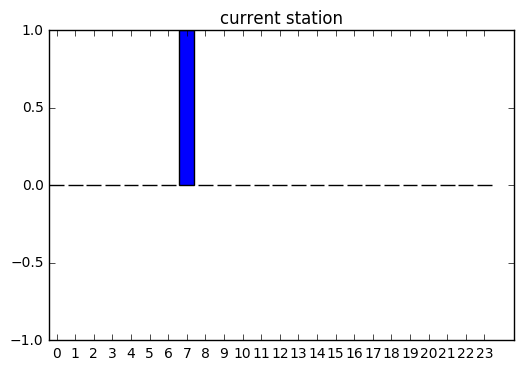

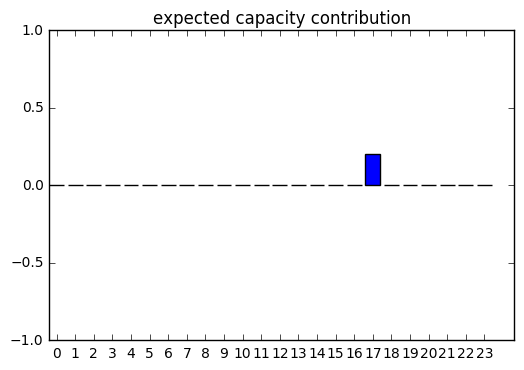

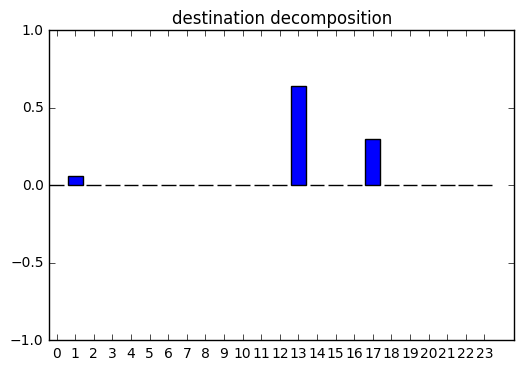

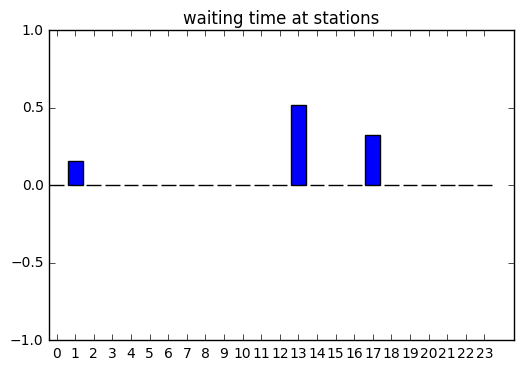

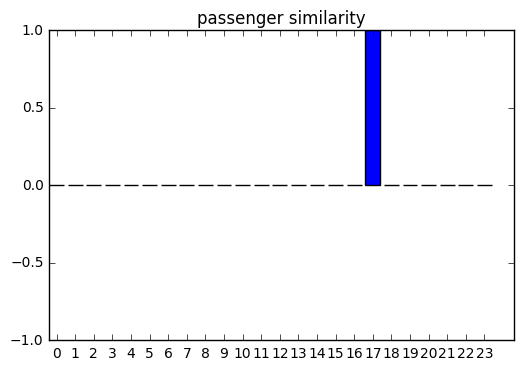

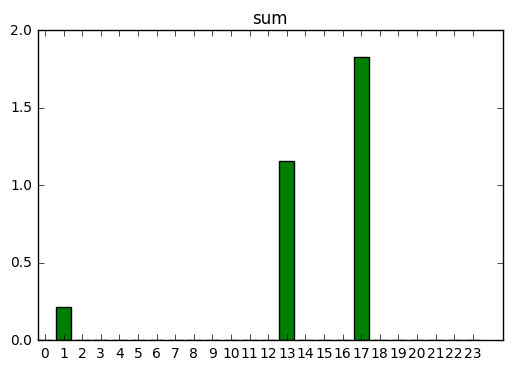

In [20]:
choice = 10


state = simulation.controller.logged_data['Bus 24 State Logger'][choice].T
s = np.zeros((24,1))
titles = ['current station','expected capacity contribution','destination decomposition','waiting time at stations','passenger similarity']
for i in range(5):
    if i>0:
        s += state[i*24:(i+1)*24] 
    plt.title(titles[i])
    plt.ylim((-1,1))
    plt.bar(range(24), state[i*24:(i+1)*24])
    plt.xticks(np.array(range(24))+0.4,range(24))
    plt.show()
        
plt.title("sum")
plt.bar(range(24), s, color='g')
plt.xticks(np.array(range(24))+0.4,range(24))
plt.show()
    


In [10]:
from scipy import sparse
not_connected = simulation.controller.adj_matrix == -np.inf
simulation.controller.adj_matrix[not_connected] = 0
m = simulation.controller.adj_matrix
s = sparse.bsr_matrix(m)

In [2]:
dist = sparse.csgraph.dijkstra(s)

NameError: name 'sparse' is not defined

In [20]:
dist

array([[  0.        ,  17.06737754,  26.59192092,  14.96950111,
         18.13177877,  20.9903743 ,  24.86443378,  18.79669128,
         18.78167125,  12.69890872,  13.77927174,  26.93310209,
         10.79669128,  12.47213595,   8.94427191,   8.54400375,
         30.42435543,  20.85033956,  11.70628141,  16.2296552 ,
          9.87048159,   6.70820393,   4.47213595,  13.06737754],
       [ 17.06737754,   0.        ,  41.23489469,  23.0992418 ,
         19.93696414,  14.22212514,  39.50740755,   5.        ,
         33.42464502,  27.34188249,  14.28010989,  10.63014581,
         25.60466521,  11.28010989,   8.12310563,  25.61138128,
         23.65610627,   9.12310563,  28.77365894,   4.24264069,
         24.51345536,  21.3511777 ,  19.28010989,   4.        ],
       [ 26.59192092,  41.23489469,   0.        ,  18.13565289,
         21.29793055,  31.29793055,  13.89301221,  36.27934012,
          7.81024968,  13.89301221,  26.9547848 ,  40.10861515,
         25.26544308,  29.9547848 ,  3